In [15]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import lilliefors

# Parametry
dfs = [i for i in range(1, 31, 1)]  # stopnie swobody
SampleSizes = [i for i in range(10, 101, 10)]  # rozmiary próbek
simulations_number = 100  # liczba symulacji

# Inicjalizacja wyników
results = []

Inicjalizacja parametrów oraz potrzebnych zmiennych

In [16]:
for Sample in SampleSizes:
    for df in dfs:
        ks_counter = 0
        lf_counter = 0
        ad_counter = 0

        for _ in range(simulations_number):
            # Generowanie danych z rozkladu t-studenta
            data = np.random.standard_t(df, size=Sample)

            # Standaryzacja danych
            data = (data - np.mean(data)) / np.std(data)

            # Test Kołmogorowa-Smirnowa
            ks_stat, p_val_ks = stats.kstest(data, 'norm')
            if p_val_ks < 0.05:
                ks_counter += 1

            # Test Lillieforsa
            lf_stat, p_val_lf = lilliefors(data)
            if p_val_lf < 0.05:
                lf_counter += 1

            # Test Andersona-Darlinga
            ad_stat, critical_values, significance_levels = stats.anderson(data, dist='norm')
            if ad_stat > critical_values[2]:  # Porównanie statystyki testowej z krytycznymi wartościami dla poziomu istotności 0.05
                ad_counter += 1

      
        results.append([Sample, df, ks_counter/simulations_number, lf_counter/simulations_number, ad_counter/simulations_number])


W algorytmie przeprowadzamy wszystkie testy po kolei, również standaryzujemy dane. Kolejno przeprowadzamy test KS, Lillieforsa i Andersona-Darlinga

In [17]:

# Wyświetlanie wyników
for result in results:
    print(f"Rozmiar próbki: {result[0]}, stopnie swobody: {result[1]}, moc testu Kołmogorowa: {result[2]}, moc testu Lillieforsa: {result[3]}, moc testu Andersona-Darlinga: {result[4]}")


Rozmiar próbki: 10, stopnie swobody: 1, moc testu Kołmogorowa: 0.19, moc testu Lillieforsa: 0.62, moc testu Andersona-Darlinga: 0.68
Rozmiar próbki: 10, stopnie swobody: 2, moc testu Kołmogorowa: 0.04, moc testu Lillieforsa: 0.29, moc testu Andersona-Darlinga: 0.32
Rozmiar próbki: 10, stopnie swobody: 3, moc testu Kołmogorowa: 0.02, moc testu Lillieforsa: 0.14, moc testu Andersona-Darlinga: 0.17
Rozmiar próbki: 10, stopnie swobody: 4, moc testu Kołmogorowa: 0.0, moc testu Lillieforsa: 0.13, moc testu Andersona-Darlinga: 0.14
Rozmiar próbki: 10, stopnie swobody: 5, moc testu Kołmogorowa: 0.0, moc testu Lillieforsa: 0.05, moc testu Andersona-Darlinga: 0.04
Rozmiar próbki: 10, stopnie swobody: 6, moc testu Kołmogorowa: 0.0, moc testu Lillieforsa: 0.07, moc testu Andersona-Darlinga: 0.11
Rozmiar próbki: 10, stopnie swobody: 7, moc testu Kołmogorowa: 0.01, moc testu Lillieforsa: 0.07, moc testu Andersona-Darlinga: 0.08
Rozmiar próbki: 10, stopnie swobody: 8, moc testu Kołmogorowa: 0.0, moc 

Tekstowa prezentacja danych

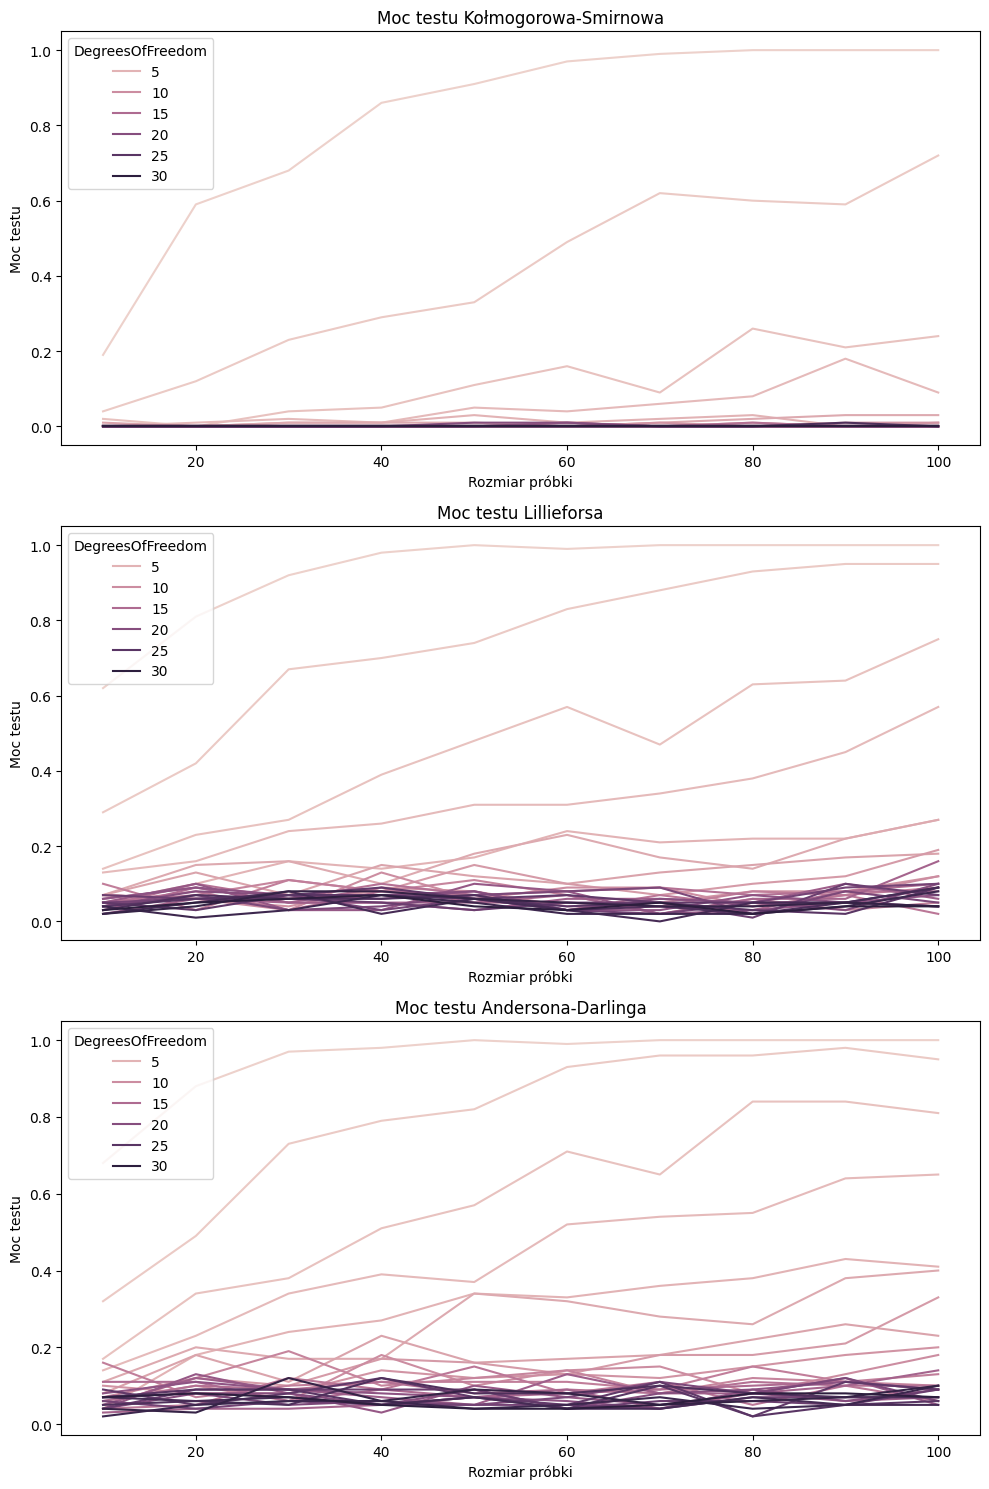

In [18]:


df_results = pd.DataFrame(results, columns=['SampleSize', 'DegreesOfFreedom', 'KSTest', 'LillieforsTest', 'AndersonDarlingTest'])

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Wykres dla testu Kołmogorowa-Smirnowa
sns.lineplot(data=df_results, x='SampleSize', y='KSTest', hue='DegreesOfFreedom', ax=axs[0])
axs[0].set_title('Moc testu Kołmogorowa-Smirnowa')
axs[0].set_xlabel('Rozmiar próbki')
axs[0].set_ylabel('Moc testu')

# Wykres dla testu Lillieforsa
sns.lineplot(data=df_results, x='SampleSize', y='LillieforsTest', hue='DegreesOfFreedom', ax=axs[1])
axs[1].set_title('Moc testu Lillieforsa')
axs[1].set_xlabel('Rozmiar próbki')
axs[1].set_ylabel('Moc testu')

# Wykres dla testu Andersona-Darlinga
sns.lineplot(data=df_results, x='SampleSize', y='AndersonDarlingTest', hue='DegreesOfFreedom', ax=axs[2])
axs[2].set_title('Moc testu Andersona-Darlinga')
axs[2].set_xlabel('Rozmiar próbki')
axs[2].set_ylabel('Moc testu')


plt.tight_layout()
plt.show()


Interpretacja i wnioski:

Test Kołmogorowa-Smirnowa: Moc testu generalnie rośnie wraz ze wzrostem rozmiaru próbki dla wszystkich stopni swobody. Dla większych stopni swobody (np. 30), moc testu jest znacznie wyższa w porównaniu do niższych stopni swobody (np. 5), co sugeruje, że test jest bardziej skuteczny w wykrywaniu odchyleń od rozkładu normalnego dla danych pochodzących z rozkładu t-Studenta o większych stopniach swobody.

Test Lillieforsa: Podobnie jak w teście Kołmogorowa-Smirnowa, moc testu zwiększa się wraz ze wzrostem rozmiaru próbki. Jednak różnice w mocy testu między różnymi stopniami swobody są mniej wyraźne, co sugeruje, że test Lillieforsa może być mniej wrażliwy na zmiany stopni swobody rozkładu t-Studenta.

Test Andersona-Darlinga: Ten test wykazuje największą moc w porównaniu do dwóch pozostałych testów dla wszystkich rozważanych stopni swobody i rozmiarów próbek. To sugeruje, że test Andersona-Darlinga może być najbardziej skuteczny w wykrywaniu odchyleń od rozkładu normalnego, gdy dane pochodzą z rozkładu t-Studenta.

Podsumowując, wszystkie trzy testy wykazują większą moc (tj. są bardziej skuteczne w wykrywaniu odchyleń od rozkładu normalnego) dla większych rozmiarów próbek i większych stopni swobody rozkładu t-Studenta. Jednak test Andersona-Darlinga wydaje się być najbardziej skuteczny w porównaniu do testów Kołmogorowa-Smirnowa i Lillieforsa. Wszystko to ma kluczowe znaczenie dla interpretacji wyników symulacji pod kątem testowania zgodności z rozkładem normalnym.